# UK Gender Pay Gap Analysis


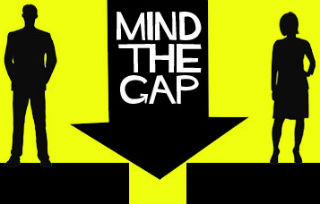

The gender pay gap is the difference in the average hourly wage of all men and women across a workforce. If women do more of the less well paid jobs within an organisation than men, the gender pay gap is usually bigger.

> The gender pay gap is not the same as unequal pay which is paying men and women differently for performing the same (or similar) work. Unequal pay has been unlawful since 1970.

Data that must be published
All employers with 250 or more employees must calculate and publish the following data:
* Their mean gender pay gap (`DiffMeanHourlyPercent`)
* Their median gender pay gap (`DiffMedianHourlyPercent`)
* Their mean bonus gender pay gap (`DiffMeanBonusPercent`)
* Their median bonus gender pay gap (`DiffMedianBonusPercent`)
* The proportion of men in the organisation receiving a bonus payment (`MaleBonusPercent`)
* The proportion of women the organisation receiving a bonus payment (`FemaleBonusPercent`)
* The proportion of men and women in each quartile pay band (`Fe/MaleLowerQuartile`) (`Fe/MaleLowerMiddleQuartile`) (`Fe/MaleUpperMiddleQuartile`)(`Fe/MaleTopQuartile`)

Using these two different types of average is helpful to give a more balanced overview of an employer’s overall gender pay gap:
* Mean averages are useful because they place the same value on every numberthey use, giving a good overall indication of the gender pay gap, but very largeor small pay rates or bonuses can ‘dominate’ and distort the answer. Forexample, mean averages can be useful where most employees in anorganisation receive a bonus but could less useful in an organisation where thevast majority of bonus pay is received by a small number of board members.
* Median averages are useful to indicate what the ‘typical’ situation is i.e. in themiddle of an organisation and are not distorted by very large or small payrates or bonuses. However, this means that not all gender pay gap issues willbe picked up. For example, a median average might show a better indication ofthe ‘middle of the road’ pay gap in a sports club with a mean average distortedby very highly paid players and board members, but it could also fail to pick upas effectively where the pay gap issues are most pronounced in the lowestpaid or highest paid employees.
[REFERENCE](https://www.acas.org.uk/media/4764/Managing-gender-pay-reporting/pdf/Managing_gender_pay_reporting_07.02.19.pdf)

For the results of the first four calculations:
* A positive percentage figure (which almost all organisations are likely to have)reveals that typically or overall, female employees have lower pay or bonusesthan male employees.
* A negative percentage figure (which some organis ations may have) revealsthat typically or overall, male employees have lower pay or bonuses thanfemale employees.
* A zero percentage figure (which is highly unlikely, but could exist for a medianpay gap where a lot of employees are concentrated in the same pay grade)would reveal no gap between the pay or bonuses of typical male and femaleemployees or completely equal pay or bonuses overall.

For example... 
 - An employer with a mean hourly rate of pay of £15.25 for all male full-pay relevant employees and £13.42 for all female full-pay relevant employees would have a 12.0% mean gender pay gap (rounded to one decimal place).


The proportion of males and females in each quartile pay band: 
* This calculation requires an employer to show the proportions of male and female full-pay relevant employees in four quartile pay bands, which is done by dividing the workforce into four equal parts. These quartile pay bands are established when making the calculation, so any other pay banding used in a workplace must not be used

For example... 
 - An employer has 322 full-pay relevant employees, has arranged them by lowest hourly rate of pay to the highest hourly rate of pay, has divided the list into four quartiles and ensured employees on the same hourly pay rate are distributed evenly by gender where they cross the quartile boundaries
 
* Of the 81 employees in the lower quartile, 48 are male and 33 are female. Thismeans 59.3% are male and 40.7% are female.
* Of the 80 employees in the lower middle quartile, 28 are male and 52 arefemale. This means 35% are male and 65% are female.
* Of the 81 employees in the upper middle quartile, 40 are male and 41 arefemale. This means 49.4% are male and 50.6% are female.
* Of the 80 employees in the upper quartile, 58 are male and 22 are female.This means 72.5% are male and 27.5% are female.


In [1]:
import io
import requests
import pandas as pd
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

def read_without_tls(url):
    """ 
    Reading data from an HTTPS endpoint with pandas is giving Certificate Error
    This helper function bypasses certificate verification and reads data to dataframe
    """
    data = requests.get(url=url, verify=False).content
    return pd.read_csv(io.StringIO(data.decode('utf8')))
        

def get_data():
    """ 
    Gender Pay Gap data is available at: https://gender-pay-gap.service.gov.uk/viewing/download
    This function downloads data for all three years and merges
    """
    years = [2017, 2018, 2019]
    url_base = 'https://gender-pay-gap.service.gov.uk/viewing/download-data/{year}'
    
    years_df = []
    for year in years:
        url=url_base.format(year=year)
        years_df.append(read_without_tls(url))
    
    return pd.concat(years_df)

In [2]:
data = get_data()
data.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,"""Bryanston School"",Incorporated",False,05/04/2018 00:00:00,27/03/2018 11:42:49
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25
2,118 LIMITED,"Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,50.0,58.0,42.0,NaN,"Emma Crowe (VP, Human Resources)",500 to 999,118 LIMITED,False,05/04/2018 00:00:00,27/03/2018 19:10:41
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,41.0,36.0,-69.8,-157.2,50.0,73.5,...,89.0,23.0,77.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,True,05/04/2018 00:00:00,04/05/2018 11:24:06
4,1610 LIMITED,"Hestercombe House,\r\nCheddon Fitzpaine,\r\nTa...",06727055,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,70.0,24.0,76.0,https://www.1610.org.uk/gender-pay-gap/,Tim Nightingale (CEO),250 to 499,1610 LIMITED,True,05/04/2018 00:00:00,12/04/2018 17:03:26


In [3]:
data.shape

(21670, 25)

In [4]:
data.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

There are number of columns of interest such as all numerical columns. There are also few unnecessary columns such as `ResponsiblePerson`, `CurrentName`

## Standard Industrial Classification (SIC) codes

`SicCodes` column tells us the nature of the business of the company. As we know that particular types of businesses attracts more men th`an women or vice versa, therefore when we are doing our analysis better we take into account of the business type.

We can obtain the latest SIC codes and their explanation from datahub.io. 

In [5]:
# SIC Codes:
url = 'https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/527619/SIC07_CH_condensed_list_en.csv'
sic = read_without_tls(url)
sic.head()

,SIC Code,Description
0,1110,"Growing of cereals (except rice), leguminous c..."
1,1120,Growing of rice
2,1130,"Growing of vegetables and melons, roots and tu..."
3,1140,Growing of sugar cane
4,1150,Growing of tobacco


Wide categroies of SIC codes are available [here](http://resources.companieshouse.gov.uk/sic/)

In [6]:
sic = read_without_tls('https://datahub.io/core/uk-sic-2007-condensed/r/uk-sic-2007-condensed.csv')
sic

,sic_code,sic_description,section,section_description,sic_version
0,1110,"Growing of cereals (except rice), leguminous c...",A,"Agriculture, Forestry and Fishing",SIC 2007
1,1120,Growing of rice,A,"Agriculture, Forestry and Fishing",SIC 2007
2,1130,"Growing of vegetables and melons, roots and tu...",A,"Agriculture, Forestry and Fishing",SIC 2007
3,1140,Growing of sugar cane,A,"Agriculture, Forestry and Fishing",SIC 2007
4,1150,Growing of tobacco,A,"Agriculture, Forestry and Fishing",SIC 2007
...,...,...,...,...,...
726,98000,Residents property management,T,Activities of households as employers; undiffe...,SIC 2007
727,98100,Undifferentiated goods-producing activities of...,T,Activities of households as employers; undiffe...,SIC 2007
728,98200,Undifferentiated service-producing activities ...,T,Activities of households as employers; undiffe...,SIC 2007
729,99000,Activities of extraterritorial organisations a...,U,Activities of extraterritorial organisations and,SIC 2007


England, Wales, Scotland and Northern Ireland are the individual countries in UK. Since all have some autonomy inside, there is likely an impact on business policies, therefore classifying company's location may reveal some insight. We will be using `Address` field to extract further information.

In [7]:
data.Address.to_numpy()

array(['Bryanston House,\r\nBlandford,\r\nDorset,\r\nUnited Kingdom,\r\nDT11 0PX',
       "19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,\r\nEH6 8NU",
       'Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\nUnited Kingdom,\r\nCF10 5BF',
       ...,
       '382 Charminster Road,\r\nBournemouth,\r\nDorset,\r\nUnited Kingdom,\r\nBH8 9SA',
       'Civic Centre,\r\nBarras Bridge,\r\nNewcastle Upon Tyne,\r\nTyne & Wear,\r\nUnited Kingdom,\r\nNE1 8PR',
       'Sandbrook House Sandbrook Park,\r\nSandbrook Way,\r\nRochdale,\r\nLancashire,\r\nUnited Kingdom,\r\nOL11 1RY'],
      dtype=object)

We will be using `pgeocode` to find `state_name` and `county_name` from the post code in the `Address` column.  

In [8]:
import pgeocode

nomi = pgeocode.Nominatim('gb')
nomi.query_postal_code("EH6 8NU")

postal_code                     EH6
country code                     GB
place_name         Edinburgh, Leith
state_name                 Scotland
state_code                      SCT
county_name       City of Edinburgh
county_code                     NaN
community_name                  NaN
community_code                  NaN
latitude                    55.9521
longitude                   -3.1844
accuracy                          4
Name: 0, dtype: object

In [9]:
data.Address[data.Address.isna()]

1254    NaN
3700    NaN
3907    NaN
6645    NaN
1316    NaN
3834    NaN
4052    NaN
6804    NaN
Name: Address, dtype: object

There are only 8 companies reported no address, we remove them as we later need country information in our model. 

In [10]:
data = data[~data.Address.isna()]

In [12]:
data.shape

(21662, 25)

In [13]:
data['postcode'] = data.apply(lambda row: row.Address.split('\n')[-1], axis=1)

In [14]:
import pgeocode

nomi = pgeocode.Nominatim('gb')
data['state_code'] = data.apply(lambda row: nomi.query_postal_code(row.postcode)['state_code'], axis=1)

In [115]:
data[["Address","postcode","state_code"]].head()

,Address,postcode,state_code
0,"Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...",DT11 0PX,ENG
1,"19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",EH6 8NU,SCT
2,"Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...",CF10 5BF,WLS
3,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",LS7 1AB,ENG
4,"Hestercombe House,\r\nCheddon Fitzpaine,\r\nTa...",TA2 8LG,ENG


Later we will try to create a model to see if gender pay gap can be identified by `EmployerSize`, `SicCodes` and `state_code`

In [16]:
diff_df = data[['DiffMeanHourlyPercent', 'DiffMedianHourlyPercent', 'DiffMeanBonusPercent', 'DiffMedianBonusPercent']]
diff_df.head()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent
0,18.0,28.2,0.0,0.0
1,2.3,-2.7,15.0,37.5
2,1.7,2.8,13.1,13.6
3,41.0,36.0,-69.8,-157.2
4,-22.0,-34.0,-47.0,-67.0


In [17]:
diff_df.mean()

DiffMeanHourlyPercent      14.245919
DiffMedianHourlyPercent    11.835532
DiffMeanBonusPercent       12.842605
DiffMedianBonusPercent    -11.928649
dtype: float64

In [18]:
data.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted', 'postcode',
       'state_code'],
      dtype='object')

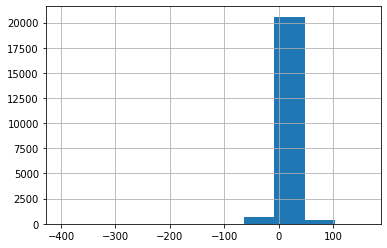

In [19]:
%matplotlib inline
import seaborn as sns
data.DiffMeanHourlyPercent.hist()

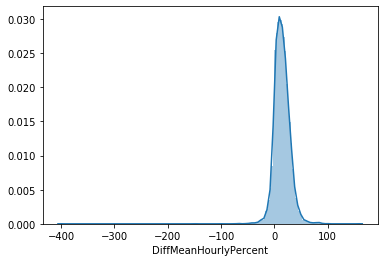

In [20]:
sns.distplot(data.DiffMeanHourlyPercent, bins=200)

In [21]:
data.DiffMeanHourlyPercent.mean()

14.245919121041455

In [22]:
data.DiffMeanBonusPercent[~data.DiffMeanBonusPercent.isna()]

0       0.0
1      15.0
2      13.1
3     -69.8
4     -47.0
       ... 
290    33.8
292    34.4
293    44.0
294    72.0
296    66.0
Name: DiffMeanBonusPercent, Length: 19798, dtype: float64

(-1000, 2000)

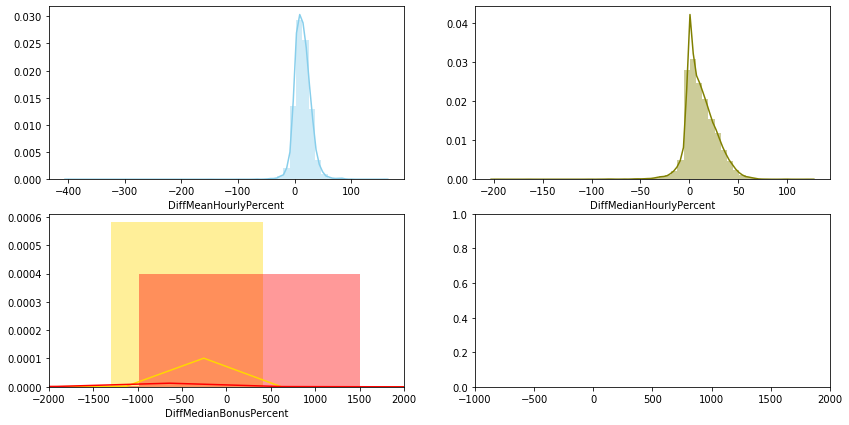

In [23]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=False)
sns.distplot( data.DiffMeanHourlyPercent , color="skyblue", ax=axes[0, 0])
sns.distplot( data.DiffMedianHourlyPercent , color="olive", ax=axes[0, 1])
sns.distplot( data.DiffMeanBonusPercent[~data.DiffMeanBonusPercent.isna()] , color="gold", ax=axes[1, 0])
sns.distplot( data.DiffMedianBonusPercent[~data.DiffMedianBonusPercent.isna()] , color="red", ax=axes[1, 0])

axes[1,0].set_xlim(-2000,2000)
axes[1,1].set_xlim(-1000,2000)

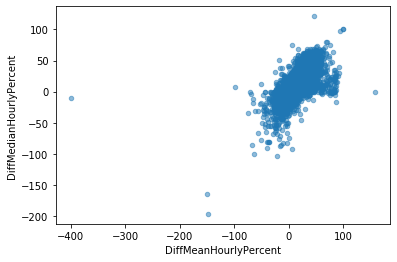

In [24]:
diff_df[~data.DiffMedianBonusPercent.isna()].plot(x='DiffMeanHourlyPercent', y='DiffMedianHourlyPercent', kind='scatter', alpha='0.5')

In [25]:
def get_sic(df):
    """ 
    Convert multiple Sic Codes to per row and cast to int
    """
    
    df = df[~df.SicCodes.isna()]
    
    df['SicCodes'] = df.apply(lambda row: row.SicCodes.replace('\n','')\
                                                      .replace('\r','')\
                                                      .split(','), axis=1)
    df = df.explode('SicCodes')
    df['SicCodes'] = pd.to_numeric(df.SicCodes)
    
    return df.merge(sic, how='left', left_on='SicCodes', 
                    right_on='sic_code')

nonkpi_cols = ['Address', 'CompanyNumber', 'SicCodes', 'sic_code', 
               'DateSubmitted', 'postcode', 'DueDate', 
               'SubmittedAfterTheDeadline','CompanyLinkToGPGInfo', 
               'CurrentName','sic_version', 'ResponsiblePerson'] 


# def join_sic(df):
#     return df.merge(sic, how='left', left_on='SicCodes', 
#                     right_on='sic_code').drop(nonkpi_cols, axis=1)
    

Outliers in the left bottom quarter are the ones with female employees has a quite considerable pay gap positively.

In [36]:
sic

,sic_code,sic_description,section,section_description,sic_version
0,1110,"Growing of cereals (except rice), leguminous c...",A,"Agriculture, Forestry and Fishing",SIC 2007
1,1120,Growing of rice,A,"Agriculture, Forestry and Fishing",SIC 2007
2,1130,"Growing of vegetables and melons, roots and tu...",A,"Agriculture, Forestry and Fishing",SIC 2007
3,1140,Growing of sugar cane,A,"Agriculture, Forestry and Fishing",SIC 2007
4,1150,Growing of tobacco,A,"Agriculture, Forestry and Fishing",SIC 2007
...,...,...,...,...,...
726,98000,Residents property management,T,Activities of households as employers; undiffe...,SIC 2007
727,98100,Undifferentiated goods-producing activities of...,T,Activities of households as employers; undiffe...,SIC 2007
728,98200,Undifferentiated service-producing activities ...,T,Activities of households as employers; undiffe...,SIC 2007
729,99000,Activities of extraterritorial organisations a...,U,Activities of extraterritorial organisations and,SIC 2007


In [116]:
f_hour_outliers = get_sic(data[data.DiffMeanHourlyPercent<-100]).drop(nonkpi_cols, axis=1)

f_hour_outliers[['EmployerName', 'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent', 'sic_description', 'section_description']]

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,sic_description,section_description
0,BAR 2010 LIMITED,-148.0,-196.5,Management consultancy activities other than f...,"Professional, scientific and technical activities"
1,COMPLETE CARE HOLDINGS LIMITED,-400.0,-11.0,Other human health activities,Human health and social work activities
2,INBRELLA LIMITED,-150.0,-164.0,Accounting and auditing activities,"Professional, scientific and technical activities"


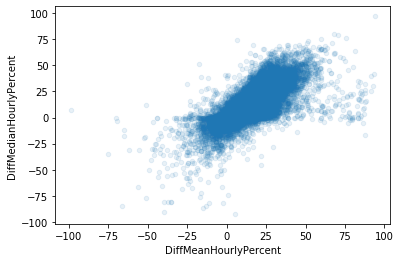

In [233]:
data[(data.DiffMeanHourlyPercent>-100) & 
     (data.DiffMeanHourlyPercent<100) &
     (data.DiffMedianHourlyPercent>-100) &
     (data.DiffMedianHourlyPercent<100)].plot(x='DiffMeanHourlyPercent', 
                                              y='DiffMedianHourlyPercent', 
                                              kind='scatter', alpha='0.1')


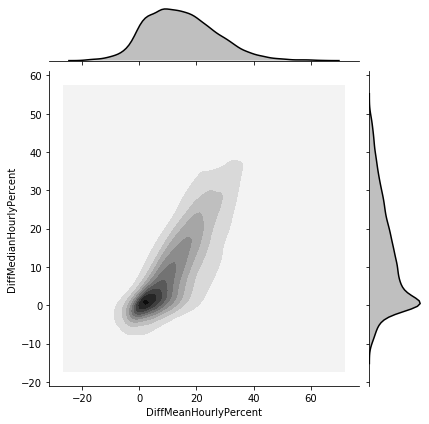

In [281]:
d = data[(data.DiffMeanHourlyPercent>-20) & 
     (data.DiffMeanHourlyPercent<65) &
     (data.DiffMedianHourlyPercent>-10) &
     (data.DiffMedianHourlyPercent<50)]

sns.jointplot(x="DiffMeanHourlyPercent", y="DiffMedianHourlyPercent", data=d, kind="kde", color='k');

generally trend looks linear but as expected the most the center of the mass is positive, meaning men's mean and median earnings are more than women's 

There is also a group of companies with `DiffMean` is substantially bigger than `DiffMedian`. The difference between mean and median tells us that typical employees, (men or women) get similar salaries , ie less gender gap for typical employee, but few male employees earn a lot so that they skew the `DiffMean`

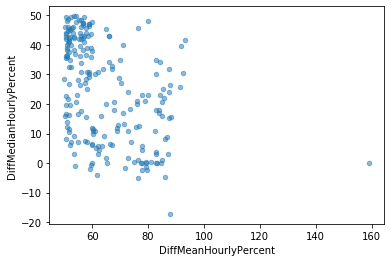

In [40]:
skewed_men_earners = data[(data.DiffMeanHourlyPercent>50) &
     (data.DiffMedianHourlyPercent<50)]

skewed_men_earners.plot(x='DiffMeanHourlyPercent', y='DiffMedianHourlyPercent', 
                        kind='scatter', alpha='0.5')


In [41]:
skewed_men_earners = get_sic(skewed_men_earners).drop(nonkpi_cols, axis=1)
skewed_men_earners

/Users/mya03/dev/junk/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,state_code,sic_description,section,section_description
0,ABERDEEN FOOTBALL CLUB PLC,55.9,17.7,76.8,85.0,23.8,15.5,75.7,24.3,68.6,31.4,65.7,34.3,91.4,8.6,250 to 499,SCT,Operation of sports facilities,R,"Arts, entertainment and recreation"
1,ABERDEEN FOOTBALL CLUB PLC,55.9,17.7,76.8,85.0,23.8,15.5,75.7,24.3,68.6,31.4,65.7,34.3,91.4,8.6,250 to 499,SCT,Activities of sport clubs,R,"Arts, entertainment and recreation"
2,ABERDEEN FOOTBALL CLUB PLC,55.6,26.6,75.0,65.3,15.4,1.6,59.7,40.3,74.2,25.8,72.7,27.3,92.4,7.6,250 to 499,SCT,Operation of sports facilities,R,"Arts, entertainment and recreation"
3,ABERDEEN FOOTBALL CLUB PLC,55.6,26.6,75.0,65.3,15.4,1.6,59.7,40.3,74.2,25.8,72.7,27.3,92.4,7.6,250 to 499,SCT,Activities of sport clubs,R,"Arts, entertainment and recreation"
4,AFC BOURNEMOUTH LIMITED,83.0,30.0,100.0,100.0,15.5,0.6,66.0,34.0,50.0,50.0,84.0,16.0,82.0,18.0,500 to 999,ENG,Activities of sport clubs,R,"Arts, entertainment and recreation"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,YOURS CLOTHING LIMITED,56.0,42.0,81.0,17.0,8.0,16.0,1.0,99.0,0.0,100.0,2.0,98.0,12.0,88.0,1000 to 4999,ENG,Retail sale of clothing in specialised stores,G,Wholesale and retail trade; repair of motor ve...
263,WOLVERHAMPTON WANDERERS FOOTBALL CLUB (1986) L...,63.3,15.9,96.7,65.0,21.0,12.0,72.2,27.8,75.4,24.6,79.6,20.4,90.0,10.0,500 to 999,ENG,Activities of sport clubs,R,"Arts, entertainment and recreation"
264,WRFC TRADING LIMITED,51.1,14.0,51.6,9.1,11.3,0.5,50.0,50.0,42.0,58.0,70.0,30.0,85.0,15.0,500 to 999,ENG,Operation of sports facilities,R,"Arts, entertainment and recreation"
265,YELL LIMITED,54.6,23.1,95.6,14.1,92.7,94.4,57.0,43.0,61.0,39.0,77.0,23.0,69.0,31.0,250 to 499,ENG,Publishing of directories and mailing lists,J,Information and communication


In [42]:
skewed_men_earners.groupby('sic_description').count()['section'].sort_values(ascending=False).head(15)

sic_description
Activities of sport clubs                                            58
Operation of sports facilities                                       37
Other sports activities                                              18
Activities of head offices                                           14
Scheduled passenger air transport                                    10
Other business support service activities n.e.c. security             8
Retail sale of clothing in specialised stores                         8
Retail sale of footwear in specialised stores                         5
Financial intermediation not elsewhere classified                     5
Banks                                                                 5
Other human health activities                                         4
Non-scheduled passenger air transport                                 3
Freight air transport                                                 3
Other letting and operating of own or leased rea

Looks like sport clubs really pay a lot for a few male employees (possibly sportsmen) than the female employees. 

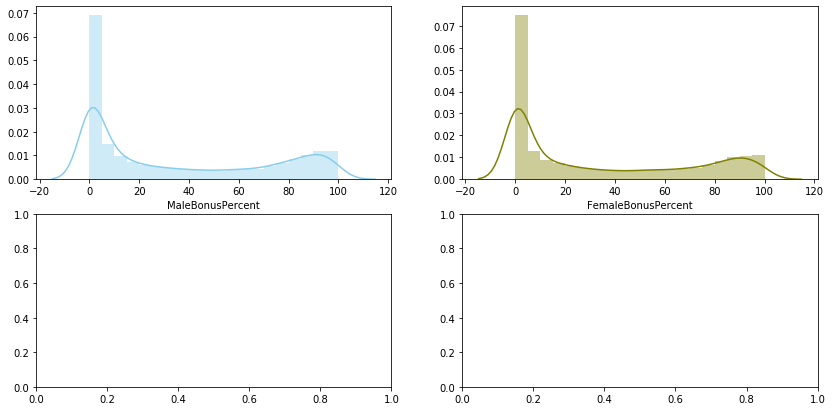

In [43]:
f, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=False)
sns.distplot(data.MaleBonusPercent , color="skyblue", ax=axes[0, 0])
sns.distplot(data.FemaleBonusPercent, color='olive', ax=axes[0, 1])

In [118]:
 `

,MaleBonusPercent,FemaleBonusPercent
MaleBonusPercent,1.000000,0.947848
FemaleBonusPercent,0.947848,1.000000


In [126]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = data.MaleBonusPercent.to_numpy()
y = data.FemaleBonusPercent.to_numpy()
# reg = LinearRegression().fit(X, y)

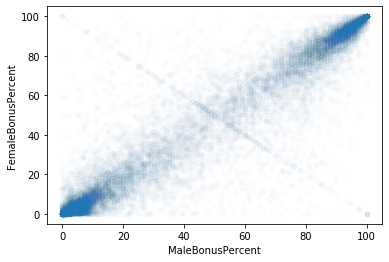

In [137]:
data.plot(x='MaleBonusPercent', y='FemaleBonusPercent', kind='scatter', alpha=0.01)
# sns.kdeplot(data.MaleBonusPercent, data.FemaleBonusPercent )

/Users/mya03/dev/junk/venv3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


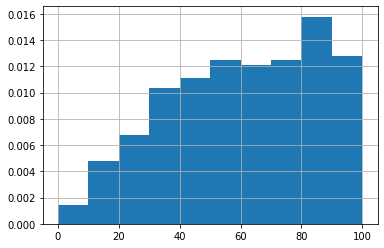

In [270]:
sns.hist()

We see the figure below has a skew to the right, meaning most of the top earning employees are men

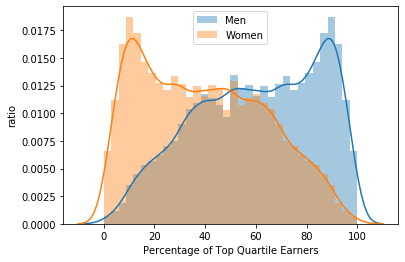

In [46]:
sns.distplot(data.MaleTopQuartile, label='Men')
ax = sns.distplot(data.FemaleTopQuartile, label='Women')
ax.set(xlabel='Percentage of Top Quartile Earners', ylabel='ratio')
plt.legend()

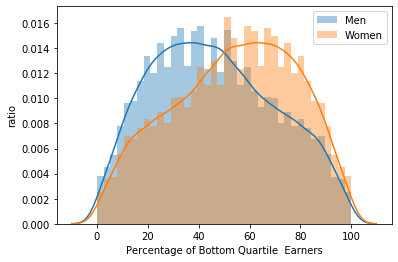

In [47]:
sns.distplot(data.MaleLowerQuartile, label='Men')
ax = sns.distplot(data.FemaleLowerQuartile, label='Women')
ax.set(xlabel='Percentage of Bottom Quartile  Earners', ylabel='ratio')
plt.legend()

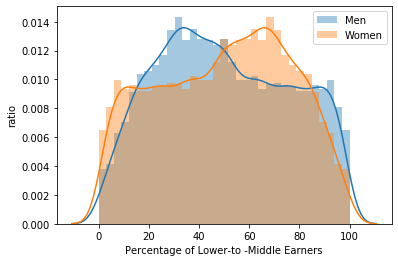

In [138]:
sns.distplot(data.MaleLowerMiddleQuartile, label='Men')
ax = sns.distplot(data.FemaleLowerMiddleQuartile, label='Women')
ax.set(xlabel='Percentage of Lower-to -Middle Earners', ylabel='ratio')
plt.legend()

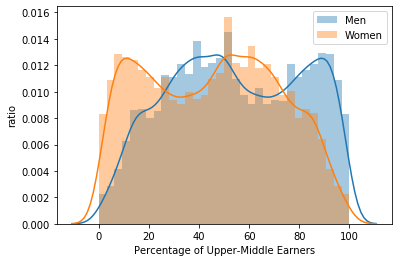

In [139]:
sns.distplot(data.MaleUpperMiddleQuartile, label='Men')
ax = sns.distplot(data.FemaleUpperMiddleQuartile, label='Women')
ax.set(xlabel='Percentage of Upper-Middle Earners', ylabel='ratio')
plt.legend()

In [50]:
data_sic = get_sic(data).drop(nonkpi_cols, axis=1)

/Users/mya03/dev/junk/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [51]:
grouped = data_sic.groupby('section_description').mean().reset_index()
grouped

,section_description,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
0,Accommodation and food service activities,11.037024,7.650309,10.172043,-20.602482,27.821089,27.120399,45.472523,54.527477,47.862650,52.137350,51.127114,48.872886,57.461198,42.538802
1,Activities of extraterritorial organisations and,11.504762,11.083333,24.456410,1.697436,31.452381,29.535714,46.935714,53.064286,48.807143,51.192857,51.557143,48.442857,55.702381,44.297619
2,Activities of households as employers; undiffe...,14.510345,10.727586,14.872000,16.880000,26.313793,23.500000,41.458621,58.541379,42.241379,57.758621,49.100000,50.900000,58.179310,41.820690
3,Administrative and support service activities,12.635020,10.443874,-2.780331,-20.942060,34.719668,33.673739,48.305755,51.694245,52.335937,47.664063,56.594561,43.405439,61.748348,38.251652
4,"Agriculture, Forestry and Fishing",14.277559,9.593307,30.228070,12.272368,36.012598,35.442126,49.749606,50.250394,54.140945,45.859055,59.138976,40.861024,65.464961,34.535039
5,"Arts, entertainment and recreation",15.242496,8.043787,10.954900,-11.053500,27.074933,24.759333,47.698332,52.301668,50.719258,49.280742,53.543141,46.456859,58.992361,41.007639
6,Construction,18.249930,17.756299,25.395935,-0.162880,40.202929,39.098233,57.852301,42.147699,66.924454,33.075546,72.052673,27.947327,75.806927,24.193073
7,Education,15.237822,17.071202,11.726188,-0.450601,18.308756,17.953732,33.496894,66.503106,37.454350,62.545650,42.083753,57.916247,48.865622,51.134378
8,"Electricity, gas, steam and air conditioning s...",14.586420,12.445062,30.566558,9.492532,50.008333,49.758025,55.866667,44.133333,62.519753,37.480247,66.492901,33.507099,71.105247,28.894753
9,Financial and insurance activities,20.195245,17.095245,32.203760,15.691767,51.503049,49.839845,44.749354,55.250646,50.397054,49.602946,57.118140,42.881860,65.727287,34.272713


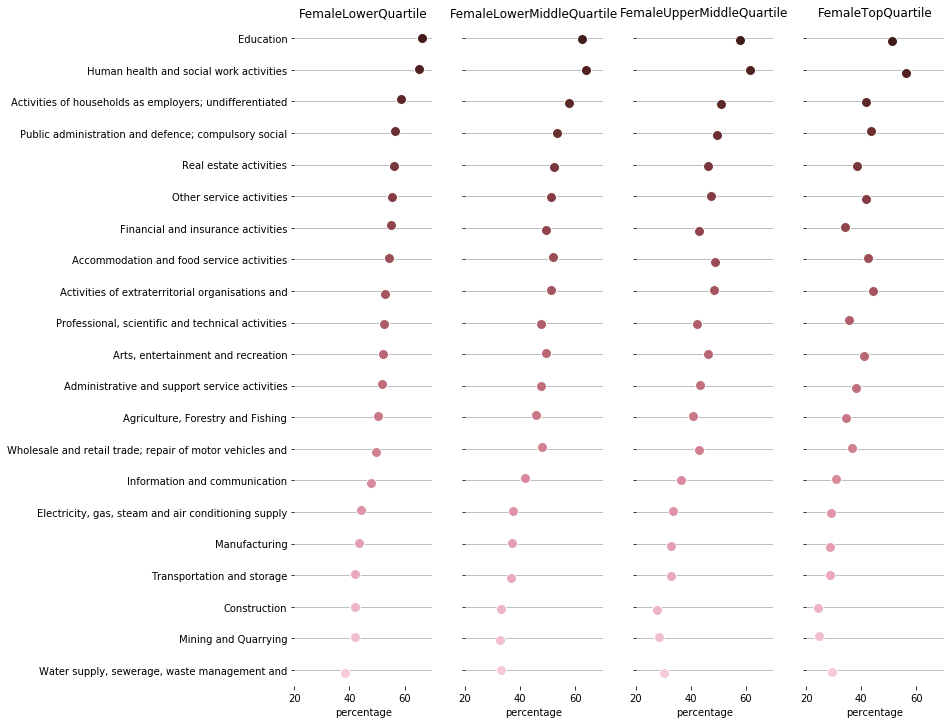

In [52]:
g = sns.PairGrid(grouped.sort_values("FemaleLowerQuartile", ascending=False),
                 x_vars=['FemaleLowerQuartile', 'FemaleLowerMiddleQuartile',
                         'FemaleUpperMiddleQuartile', 'FemaleTopQuartile'], 
                 y_vars=["section_description"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")


# Use the same x axis limits on all columns and add better labels
g.set(xlim=(20, 70), xlabel="percentage", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["FemaleLowerQuartile", "FemaleLowerMiddleQuartile", 'FemaleUpperMiddleQuartile', 'FemaleTopQuartile']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

The graph above tells us few things:

* Women are more concentrated in categories requires less physical power as expected, with more focus on service sector. Sectors require more physical power are less occupied by women such as, mining, transportation and construction. This is expected and in line with our daily experiences. 

* The real interesting observation is that consistently in all categories women are less likely to climb to higher earning positions, no matter it is education or construction. This is a strong argument that women has disadvantage and there is a gender pay gap in the sense that things are more difficult for women. This means either women cannot promote easily, or even they promote they are paid less than their male coworkers for the same job, or combination of both.



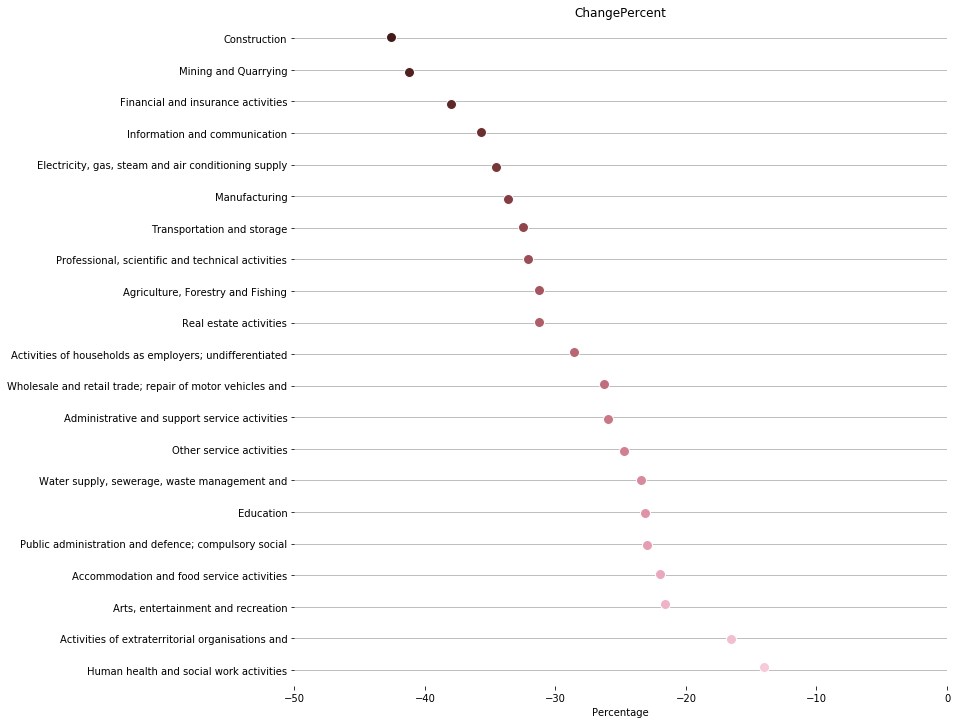

In [53]:
grouped['ChangePercent'] = (( grouped.FemaleTopQuartile - grouped.FemaleLowerQuartile ) / grouped.FemaleLowerQuartile) *100

g = sns.PairGrid(grouped.sort_values("ChangePercent", ascending=True),
                 x_vars=['ChangePercent'], 
                 y_vars=["section_description"],
                 height=10, aspect=1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")


# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-50, 0), xlabel="Percentage", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['ChangePercent']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

Above shows women are in construction and mining sector are the most disadvantageous, as their chance to climb to higher earning quartile is less likely. 

One interesting observation is that, soft area such as Financial and Insurance activities also shows that there is a big obstacle for women to be represented in higher earning quartile. This is a bir more of a speculation but thre is a possibility that the pressure in finance sector penalizes women for things like pregnancy as the time lost at work directly impacts revenue, but other sectors such as human health and social work activities are more permissive and flexible. 

In [54]:
grouped[['section_description', "FemaleLowerQuartile", 'FemaleTopQuartile']]

,section_description,FemaleLowerQuartile,FemaleTopQuartile
0,Accommodation and food service activities,54.527477,42.538802
1,Activities of extraterritorial organisations and,53.064286,44.297619
2,Activities of households as employers; undiffe...,58.541379,41.820690
3,Administrative and support service activities,51.694245,38.251652
4,"Agriculture, Forestry and Fishing",50.250394,34.535039
5,"Arts, entertainment and recreation",52.301668,41.007639
6,Construction,42.147699,24.193073
7,Education,66.503106,51.134378
8,"Electricity, gas, steam and air conditioning s...",44.133333,28.894753
9,Financial and insurance activities,55.250646,34.272713


In [56]:
melted = pd.melt(data, 
        value_vars=[ 'FemaleLowerQuartile', 'FemaleLowerMiddleQuartile', 
                     'FemaleUpperMiddleQuartile','FemaleTopQuartile'], 
        var_name='EarningQuartile', value_name='Percent')
melted

,EarningQuartile,Percent
0,FemaleLowerQuartile,75.6
1,FemaleLowerQuartile,79.7
2,FemaleLowerQuartile,49.0
3,FemaleLowerQuartile,100.0
4,FemaleLowerQuartile,44.0
...,...,...
86643,FemaleTopQuartile,35.1
86644,FemaleTopQuartile,2.0
86645,FemaleTopQuartile,0.0
86646,FemaleTopQuartile,53.0


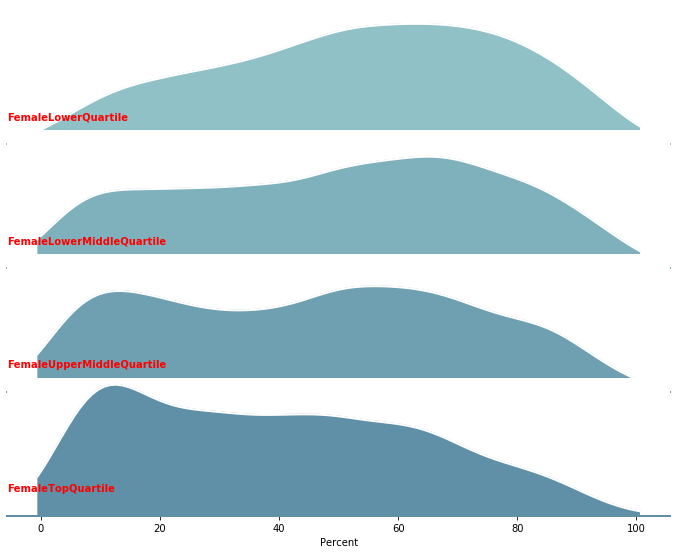

In [57]:

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(melted, row="EarningQuartile", hue="EarningQuartile", aspect=5, height=2, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Percent", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Percent", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color='red',
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Percent")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.1)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [58]:
data_sic

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,state_code,sic_description,section,section_description
0,"""Bryanston School"",Incorporated",18.0,28.2,0.0,0.0,0.0,0.0,24.4,75.6,50.8,49.2,49.2,50.8,51.5,48.5,500 to 999,ENG,General secondary education,P,Education
1,"""Bryanston School"",Incorporated",18.0,28.2,0.0,0.0,0.0,0.0,24.4,75.6,50.8,49.2,49.2,50.8,51.5,48.5,500 to 999,ENG,General secondary education,P,Education
2,"""Bryanston School"",Incorporated",18.0,28.2,0.0,0.0,0.0,0.0,24.4,75.6,50.8,49.2,49.2,50.8,51.5,48.5,500 to 999,ENG,Glazing,F,Construction
3,"""Bryanston School"",Incorporated",19.6,32.5,NaN,NaN,0.0,0.0,32.4,67.6,38.2,61.8,44.9,55.1,53.3,46.7,500 to 999,ENG,General secondary education,P,Education
4,"""Bryanston School"",Incorporated",19.6,32.5,NaN,NaN,0.0,0.0,32.4,67.6,38.2,61.8,44.9,55.1,53.3,46.7,500 to 999,ENG,General secondary education,P,Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61055,ZURICH EMPLOYMENT SERVICES LIMITED,26.6,29.6,56.9,53.2,95.0,94.0,36.9,63.1,38.8,61.2,54.4,45.6,70.9,29.1,1000 to 4999,ENG,Human resources provision and management of hu...,N,Administrative and support service activities
61056,ZURICH EMPLOYMENT SERVICES LIMITED,26.6,29.6,56.9,53.2,95.0,94.0,36.9,63.1,38.8,61.2,54.4,45.6,70.9,29.1,1000 to 4999,ENG,Other business support service activities n.e....,N,Administrative and support service activities
61057,ZURICH UK GENERAL SERVICES LIMITED,22.3,23.8,51.6,50.6,95.0,96.0,37.9,62.1,61.8,38.2,71.0,29.0,70.2,29.8,1000 to 4999,ENG,Other business support service activities n.e....,N,Administrative and support service activities
61058,ZUTO HOLDINGS LIMITED,25.0,21.0,48.0,56.0,58.0,84.0,41.0,59.0,62.0,38.0,72.0,28.0,80.0,20.0,250 to 499,ENG,Activities of head offices,M,"Professional, scientific and technical activities"


Can we guess the `FemaleTopQuartile` based on parameters like `EmployerSize`  `state_code` and `section`? 

let's try to build a LinearRegression model.

In [59]:
data_sic.groupby('state_code')['FemaleTopQuartile', 'FemaleLowerQuartile'].mean()

,FemaleTopQuartile,FemaleLowerQuartile
state_code,,
ENG,40.498168,54.742735
NIR,25.343624,38.180537
SCT,35.540192,48.257735
WLS,37.425233,51.363121


In [149]:
data_sic.groupby('section_description')['FemaleTopQuartile', 'FemaleLowerQuartile'].mean().sort_values("FemaleTopQuartile")

,FemaleTopQuartile,FemaleLowerQuartile
section_description,,
Construction,24.193073,42.147699
Mining and Quarrying,24.752465,42.079930
Transportation and storage,28.492411,42.176426
Manufacturing,28.833697,43.433240
"Electricity, gas, steam and air conditioning supply",28.894753,44.133333
"Water supply, sewerage, waste management and",29.277821,38.237743
Information and communication,30.795792,47.885542
Financial and insurance activities,34.272713,55.250646
"Agriculture, Forestry and Fishing",34.535039,50.250394


In [155]:
data.groupby('SubmittedAfterTheDeadline')['FemaleTopQuartile', 'FemaleLowerQuartile'].mean()

,FemaleTopQuartile,FemaleLowerQuartile
SubmittedAfterTheDeadline,,
False,39.394641,53.861845
True,41.625403,53.241520


In [151]:
data_sic.groupby('EmployerSize')['FemaleTopQuartile', 'FemaleLowerQuartile'].mean()

,FemaleTopQuartile,FemaleLowerQuartile
EmployerSize,,
1000 to 4999,41.616338,55.431998
"20,000 or more",39.582908,56.262755
250 to 499,39.283611,53.674903
500 to 999,39.378246,53.170965
"5000 to 19,999",45.549486,60.253206
Less than 250,42.492031,56.999832
Not Provided,40.321589,53.487106


In [408]:
data_sic[['FemaleTopQuartile', 'state_code', 'EmployerSize', 'section']].groupby('EmployerSize').count()

,FemaleTopQuartile,state_code,section
EmployerSize,,,
1000 to 4999,13263,13118,11545
"20,000 or more",393,391,350
250 to 499,27479,27229,24799
500 to 999,14543,14396,13080
"5000 to 19,999",2821,2787,2307
Less than 250,1778,1761,1563
Not Provided,670,670,600


Let's filter out Not Provided, and remove nan values

In [158]:
data_sic_nona = data_sic[['FemaleTopQuartile', 'state_code', 'EmployerSize', 'section']].dropna()

In [159]:
data_sic_nona = data_sic_nona[data_sic_nona.EmployerSize != "Not Provided"]

In [160]:
data_sic_nona.groupby('EmployerSize').count()

,FemaleTopQuartile,state_code,section
EmployerSize,,,
1000 to 4999,11424,11424,11424
"20,000 or more",348,348,348
250 to 499,24656,24656,24656
500 to 999,12972,12972,12972
"5000 to 19,999",2287,2287,2287
Less than 250,1555,1555,1555


In [166]:
data_sic_nona.head()

,FemaleTopQuartile,state_code,EmployerSize,section
0,48.5,ENG,500 to 999,P
1,48.5,ENG,500 to 999,P
2,48.5,ENG,500 to 999,F
3,46.7,ENG,500 to 999,P
4,46.7,ENG,500 to 999,P


In [165]:
data_sic_nona.FemaleTopQuartile.quantile([0.33, 0.66])

0.33    22.5
0.66    50.6
Name: FemaleTopQuartile, dtype: float64

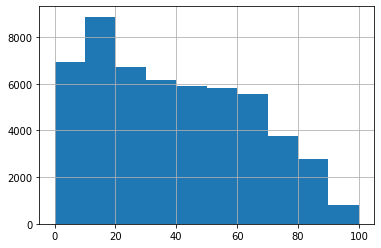

In [68]:
data_sic_nona.FemaleTopQuartile.hist()

let's divide `FemaleTopQuartile` into three categories, 
    * High: Women are represented more than 66% in `FemaleTopQuartile`
    * Middle: Women are represented between 33% and 66% in `FemaleTopQuartile`
    * Low: Women are represented less than 33% in `FemaleTopQuartile`


In [167]:
def map_femaletopquartile(x):
    if x > 50.6:
        return "High"
    if x < 22.5:
        return "Low"
    return "Middle"


In [168]:
data_sic_nona['label'] = data_sic_nona.apply(lambda row: map_femaletopquartile(row.FemaleTopQuartile), axis=1)

In [169]:
data_sic_nona

,FemaleTopQuartile,state_code,EmployerSize,section,label
0,48.5,ENG,500 to 999,P,Middle
1,48.5,ENG,500 to 999,P,Middle
2,48.5,ENG,500 to 999,F,Middle
3,46.7,ENG,500 to 999,P,Middle
4,46.7,ENG,500 to 999,P,Middle
...,...,...,...,...,...
61055,29.1,ENG,1000 to 4999,N,Middle
61056,29.1,ENG,1000 to 4999,N,Middle
61057,29.8,ENG,1000 to 4999,N,Middle
61058,20.0,ENG,250 to 499,M,Low


In [80]:
data_sic_nona = data_sic_nona.drop('FemaleTopQuartile', axis=1)

In [83]:
data_sic_nona

,state_code,EmployerSize,section,label
0,ENG,500 to 999,P,Middle
1,ENG,500 to 999,P,Middle
2,ENG,500 to 999,F,Middle
3,ENG,500 to 999,P,Middle
4,ENG,500 to 999,P,Middle
...,...,...,...,...
61055,ENG,1000 to 4999,N,Low
61056,ENG,1000 to 4999,N,Low
61057,ENG,1000 to 4999,N,Low
61058,ENG,250 to 499,M,Low


In [171]:
y = data_sic_nona.label
X = pd.get_dummies(data_sic_nona.drop('label', axis=1))

In [172]:
X.columns

Index(['FemaleTopQuartile', 'state_code_ENG', 'state_code_NIR',
       'state_code_SCT', 'state_code_WLS', 'EmployerSize_1000 to 4999',
       'EmployerSize_20,000 or more', 'EmployerSize_250 to 499',
       'EmployerSize_500 to 999', 'EmployerSize_5000 to 19,999',
       'EmployerSize_Less than 250', 'section_A', 'section_B', 'section_C',
       'section_D', 'section_E', 'section_F', 'section_G', 'section_H',
       'section_I', 'section_J', 'section_K', 'section_L', 'section_M',
       'section_N', 'section_O', 'section_P', 'section_Q', 'section_R',
       'section_S', 'section_T', 'section_U'],
      dtype='object')

In [89]:
y

0        Middle
1        Middle
2        Middle
3        Middle
4        Middle
          ...  
61055       Low
61056       Low
61057       Low
61058       Low
61059       Low
Name: label, Length: 53242, dtype: object

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

clf = DecisionTreeClassifier(random_state=0)
# clf = AdaBoostClassifier()
# clf = SVC(kernel="linear", C=0.025)
# clf = SVC(gamma=2, C=1)
clf.fit(X_train, y_train)
# cross_val_score(clf, X_train, y_train, cv=3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [174]:
clf.score(X_test, y_test)  

0.541459291952296

In [175]:
pred = clf.predict(X_test)

In [176]:
pred

array(['Low', 'Low', 'Low', ..., 'Low', 'Low', 'Middle'], dtype=object)

In [177]:
((y_test == 'Low') == (pred == 'Low')).mean()

0.6271950417879613

In [179]:
((y_test == 'Middle') == (pred == 'Middle')).mean()

0.6352709174570382

In [180]:
((y_test == 'High') == (pred == 'High')).mean()

0.8204526246595925

In [81]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [424]:
one_hot_encoded = pd.get_dummies(data_sic_nona)

In [427]:
y = one_hot_encoded.FemaleTopQuartile
X = one_hot_encoded.drop('FemaleTopQuartile', axis=1)

In [428]:
X.columns

Index(['state_code_ENG', 'state_code_NIR', 'state_code_SCT', 'state_code_WLS',
       'EmployerSize_1000 to 4999', 'EmployerSize_20,000 or more',
       'EmployerSize_250 to 499', 'EmployerSize_500 to 999',
       'EmployerSize_5000 to 19,999', 'EmployerSize_Less than 250',
       'section_A', 'section_B', 'section_C', 'section_D', 'section_E',
       'section_F', 'section_G', 'section_H', 'section_I', 'section_J',
       'section_K', 'section_L', 'section_M', 'section_N', 'section_O',
       'section_P', 'section_Q', 'section_R', 'section_S', 'section_T',
       'section_U'],
      dtype='object')

In [429]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [437]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
predictions = reg.predict(X_test)

In [438]:
predictions

array([51.15625, 37.375  , 37.375  , ..., 50.875  , 50.875  , 35.1875 ])

In [444]:
X_train.iloc[21168].values

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [442]:
y_train.iloc[21168]

14.0

In [447]:
reg.predict([X_train.iloc[21168].values])

array([28.3125])

In [449]:
y_train.iloc[12632]

41.4

In [450]:
reg.predict([X_train.iloc[12632].values])

array([50.875])

In [ ]:
np.xor()